# VV8. Jarðskjálftar og eldgos á Reykjanesskaga 2021

In [16]:
import pandas as pd

colNames = ['tími','latitude','longitude','magnitude']
url = 'https://cs.hi.is/python/skjalftar.txt'
df = pd.read_csv(url, sep='\s+', names = colNames,)
df['tími'] = pd.to_datetime(df['tími'])
dagur1 = pd.to_datetime('24.02.2021', dayfirst=True)
df['dagur'] = ((df['tími'] - dagur1).dt.total_seconds()/(60*60*24))
pd.set_option('display.max_rows', 15)
display(df)





,tími,latitude,longitude,magnitude,dagur
0,2021-02-24 10:05:57,63.919,-22.201,5.64,0.420799
1,2021-02-24 10:42:39,63.880,-21.622,4.39,0.446285
2,2021-02-24 10:49:00,63.889,-22.394,4.75,0.450694
3,2021-02-24 11:38:38,63.921,-21.948,4.04,0.485162
4,2021-02-24 12:37:30,63.928,-21.989,4.48,0.526042
...,...,...,...,...,...
55,2021-03-14 12:34:36,63.872,-22.285,4.63,18.524028
56,2021-03-14 14:15:25,63.868,-22.342,5.33,18.594039
57,2021-03-14 14:38:23,63.887,-22.463,4.09,18.609988
58,2021-03-15 22:31:55,63.904,-22.250,4.11,19.938831


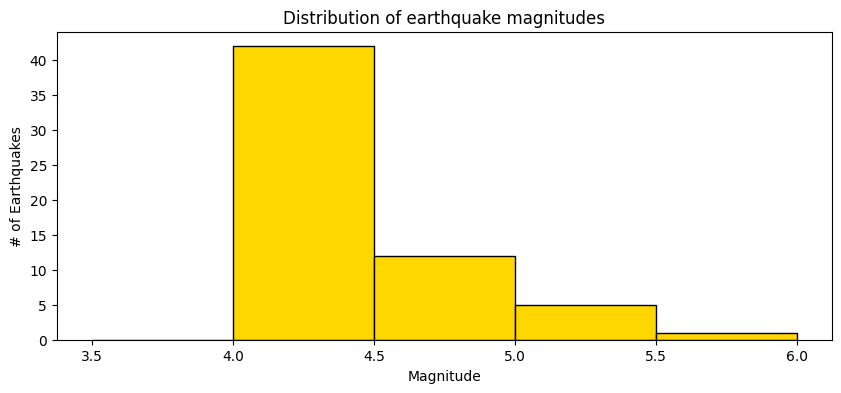

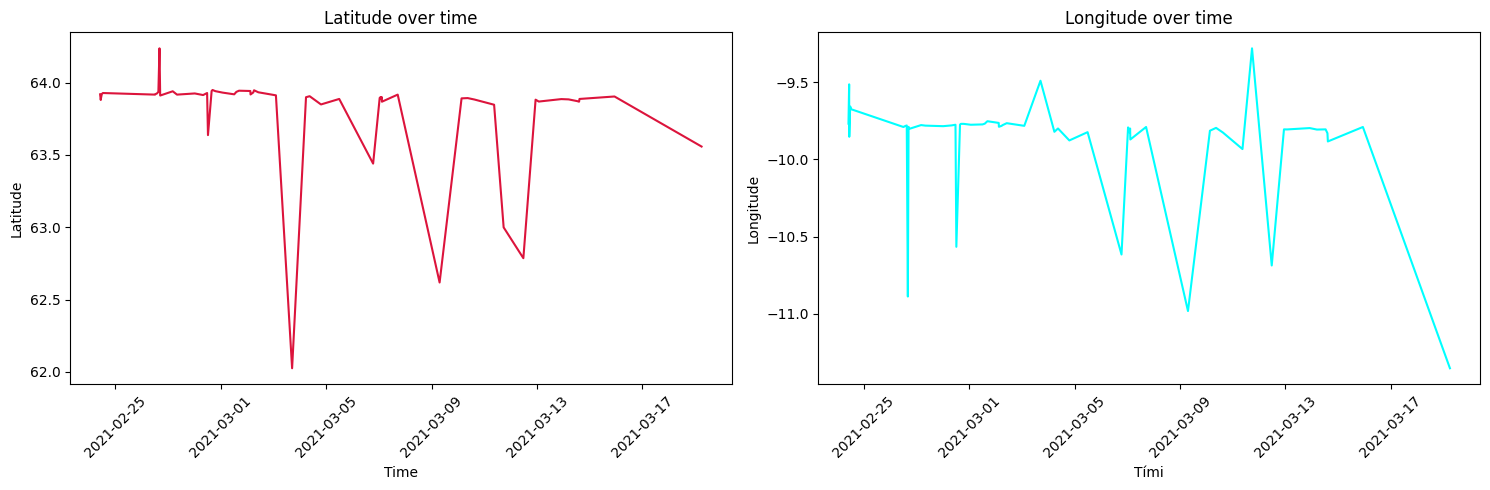

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(df['magnitude'], bins=[3.5, 4, 4.5, 5, 5.5, 6], edgecolor='black',color="gold")
plt.title('Distribution of earthquake magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('# of Earthquakes')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df['tími'], df['latitude'], label='Latitude', color='crimson')
ax[0].set_title('Latitude over time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Latitude')
ax[0].tick_params(axis='x', rotation=45)


df['breytt_long'] = df['longitude'] * 0.44
ax[1].plot(df['tími'], df['breytt_long'], label='Longitude', color='aqua')
ax[1].set_title('Longitude over time')
ax[1].set_xlabel('Tími')
ax[1].set_ylabel('Longitude')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 


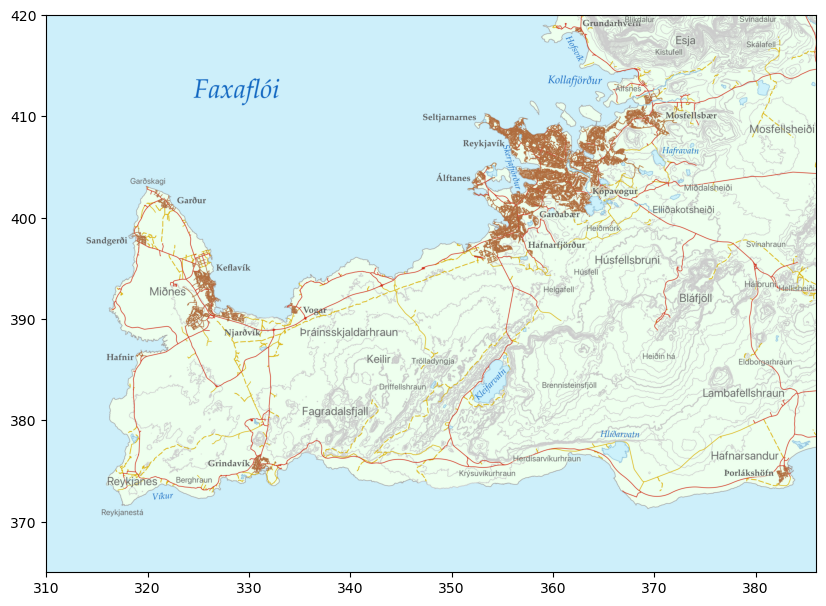

In [16]:
from pyproj import Transformer as Trans
import numpy as np
import matplotlib.pyplot as plt
# Create a transformer object for converting from latitude and longitude to EPSG:3057
hnatt2xy = Trans.from_crs("EPSG:4326", "EPSG:3057", always_xy=True).transform

def trans(lat, lon):
    x, y = hnatt2xy(lon, lat)
    return x / 1000, y / 1000


#KORTFÖLL
def lesa_qgis_kort(skrá):
    # Les kort úr skrá.png og skrá.pgw og skilar pari (kort,mörk) með þrívíðu
    # NumPy-fylki með kortinu ásamt fjögurra staka vigur með hnitum í kílómetrum
    # á vestur-, austur-, suður- og norðurbrúnum kortsins, mörk = [xv,xa,ys,yn].
    from PIL import Image
    from urllib.request import urlopen
    kort = Image.open(urlopen(skrá + ".png"))
    kort = np.flipud(kort)  # svo kort sé ekki á hvolfi
    world = np.loadtxt(skrá + ".pgw")
    (hæð,breidd) = np.shape(kort)[0:2]
    skali = world[0]  # metrar á díl (pixel) í png-skránni
    xv = world[4]
    xa = xv + skali*breidd
    yn = world[5]
    ys = yn - skali*hæð
    mörk = np.array([xv,xa,ys,yn])/1000  # breytt í km
    return (kort,mörk)

def sýna_kort(kort, mörk, gluggabreidd, dpi=100):
    # Birtir kort í Matplotlib glugga og setur mörk ása til samræmis við mörk
    # kortsins; gluggabreidd og dpi eru notuð til að búa gluggann til með
    # plt.figure kalli, sem gefur glugganum tilgreinda breidd (í tommum) og hæð
    # sem ákvarðast hlutfallslega eftir lögun kortsins
    (hæð, breidd) = np.shape(kort)[0:2]
    plt.figure(figsize=(gluggabreidd, gluggabreidd*hæð/breidd), dpi=dpi)
    plt.axis(mörk)
    plt.imshow(kort, origin='lower', extent=plt.axis())
    plt.show()

url = 'https://cs.hi.is/python/reykjanesskagi'
kort, mörk = lesa_qgis_kort(url)
sýna_kort(kort, mörk, 10)

#

In [13]:
import numpy as np
def f(x):
    value = x
    return value


def f(x):
    fall = (4*x[0]**2) - (4*x[0]*x[1]) + (2*x[1]**2) + (10*x[0]) - (6*x[1]) 
    return fall  

def df(x):
    df_x = (8*x[0]) - (4*x[1]) + 10
    df_y = (-4*x[0]) + (4*x[1]) - 6
    return np.array([df_x, df_y])

def d2f(x):
    return np.array([[8, -4], [-4, 4]])


def finna_min(f, df, d2f, x0, tol, max_iter):
    x_k = np.array(x0)
    for _ in range(max_iter):
        grad = df(x_k)
        Hessian = d2f(x_k)
        x_k_new = x_k - np.dot(np.linalg.inv(Hessian), grad)
        if np.linalg.norm(x_k_new - x_k) < tol:
            return x_k_new, f(x_k_new)
        x_k = x_k_new
    return x_k, f(x_k)

upphaf= [0, 0]
tol = 1e-6
max_iter = 100

lagpunkt, laggildi = finna_min(f, df, d2f, upphaf, tol, max_iter)
print(f'Staðsetning laggildis {lagpunkt}\n gildi falls í þessum punkti {laggildi}')


            

Staðsetning laggildis [-1.   0.5]
 gildi falls í þessum punkti -6.5
